## Understanding Markov Processes

### Markov Processes:
A Markov process (often referring specifically to a Markov chain when talking about discrete-time processes) is a mathematical model that undergoes transitions from one state to another within a finite or countable number of possible states. The key property of a Markov process is that the probability of transitioning to any particular state is dependent solely on the current state and time elapsed, and not on the sequence of states that preceded it.

Properties:

- Memorylessness: The future state only depends on the current state and not the sequence of states that led to the current state.
- Transition Probabilities: In a discrete-time Markov chain, these probabilities can be represented using a matrix, where the entry at row *i* and column *j* represents the probability of transitioning from state *i* to state *j*.

### The problem:
We want to study the movement of a customer over a period of time among the different restaurants of a famous chain in town. We will use Markov processes to model the custumer's behavior.

Consider there are 3 restaurants in the town part of the chain: Burger Joint, Pizza Place, and Sushi Bar. Over time, based on the preferences and options, a customer might decide to switch restaurants or stay at the current one.

In [ ]:
################################################################################################
# RUNME ONCE: only if the imports in the next cell does not work.
# Run this cell once in order to install the dependencies needed for the lab.
# After running this cell, remember to restart the kernel and proceed executing the next cells.
################################################################################################

!pip3 install matplotlib numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Markov Process:
- Initially, assume equal probability to start from any restaurant.
- Consider the following probabilities to change restaurants:
        
        - From Burger Joint to Pizza Place: 20%
        - From Burger Joint to Sushi Bar: 20%
        - From Pizza Place to Burger Joint: 10%
        - From Pizza Place to Sushi Bar: 20%
        - From Sushi Bar to Burger Joint: 20%
        - From Sushi Bar to Pizza Place: 30%


In [ ]:
# State space
restaurants = [0, 1, 2] # COMPLETE: define the state space as a list.
"""COMMENTS : The state space is the set of restaurants listed above. To ease the writing (i.e. to avoid writing the name of each restaurant at each time), I used numbers to represent each restaurant.
In this case, I represented Burger Joint as restaurant 0, Pizza Place as restaurant 1, and Sushi Bar as restaurant 2."""

# Initial probabilities for states
initial_probabilities = [1/3,1/3,1/3] # COMPLETE: assuming an equal chance to start from any restaurant.
"""COMMENTS : There are 3 possible states, with each one having equal probability at the beginning. Therefore, the initial probability for each restaurant would be 1 divided by 3,
or 0,33. I chose one probability to be 0.34 because the python compiler doesn't allow me to generate a random choice from a probability list whose sum doesn't add up to 1."""

# Transition matrix
# Rows: current state, Columns: next state
transition_matrix = [[0.6, 0.2, 0.2],
                     [0.1, 0.7, 0.2],
                     [0.2, 0.3, 0.5]]
                     # COMPLETE: transition matrix based on the probabilities stated above.
"""COMMENTS : The first, second, and third row represent restaurants 0 (Burger Joint), 1 (Pizza Place), and 2 (Sushi Bar) respectively as the current states,
whereas the first, second, and third row represent restaurants 0 (Burger Joint), 1 (Pizza Place), and 2 (Sushi Bar) respectively as the next states"""


'COMMENTS : The first, second, and third row represent restaurants 0 (Burger Joint), 1 (Pizza Place), and 2 (Sushi Bar) respectively as the current states,\nwhereas the first, second, and third row represent restaurants 0 (Burger Joint), 1 (Pizza Place), and 2 (Sushi Bar) respectively as the next states'

### Simulating the Markov Process:

In [ ]:
def simulate_restaurant_visits(days, initial_probabilities, transition_matrix):
    current_restaurant = np.random.choice(restaurants, p=initial_probabilities)
    visit_sequence = [current_restaurant]

    for day in range(days - 1):
        # COMPLETE:
        # Implement the Markov process logic: Based on the current restaurant, move to the next one according the transition matrix defined before
        # Store the next restaurant in the variable next_restaurant
        # Hint: check the function numpy.random.choice()

        next_restaurant = np.random.choice(restaurants, p = transition_matrix[current_restaurant])
        """ COMMENTS : the next restaurant is determined by the probability list of the CURRENT restaurant.
            This means that we have to access the corresponding list inside the transition matrix by using the index of the current restaurant."""



        visit_sequence.append(next_restaurant)
        current_restaurant = next_restaurant

    return visit_sequence

# Simulating restaurant visits for 15 days
days = 15
visit_sequence = simulate_restaurant_visits(days, initial_probabilities, transition_matrix)
print(visit_sequence)

def modify_number_to_names(visit_sequence):
  for i in range(len(visit_sequence)):
    if visit_sequence[i]==0:
      visit_sequence[i]= "Burger Joint"
    elif visit_sequence[i]==1:
      visit_sequence[i]="Pizza Place"
    else :
      visit_sequence[i]="Sushi Bar"

modify_number_to_names(visit_sequence)
print(visit_sequence)

[2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
['Sushi Bar', 'Sushi Bar', 'Sushi Bar', 'Burger Joint', 'Sushi Bar', 'Sushi Bar', 'Sushi Bar', 'Sushi Bar', 'Sushi Bar', 'Sushi Bar', 'Pizza Place', 'Pizza Place', 'Pizza Place', 'Pizza Place', 'Pizza Place']


### Visualize the Markov Process:

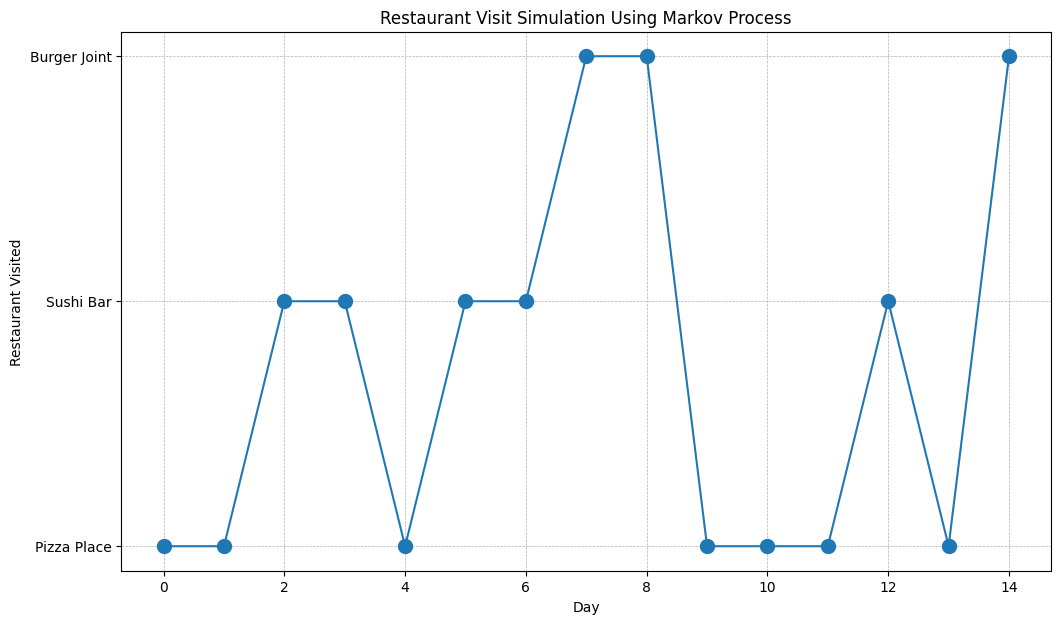

In [ ]:
def plot_restaurant_simulation(visit_sequence):
    days = len(visit_sequence)
    day_numbers = list(range(days))

    plt.figure(figsize=(12, 7))
    plt.plot(day_numbers, visit_sequence, '-o', markersize=10)
    plt.yticks(restaurants)
    plt.xlabel('Day')
    plt.ylabel('Restaurant Visited')
    plt.title('Restaurant Visit Simulation Using Markov Process')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_restaurant_simulation(visit_sequence)

### Question:

Modify the values of the transition matrix to study how different probabilities influence the custumer's choices. Comment about your observations.

['Pizza Place', 'Pizza Place', 'Pizza Place', 'Pizza Place', 'Sushi Bar', 'Sushi Bar', 'Burger Joint', 'Burger Joint', 'Pizza Place', 'Pizza Place', 'Pizza Place', 'Pizza Place', 'Sushi Bar', 'Pizza Place', 'Pizza Place']


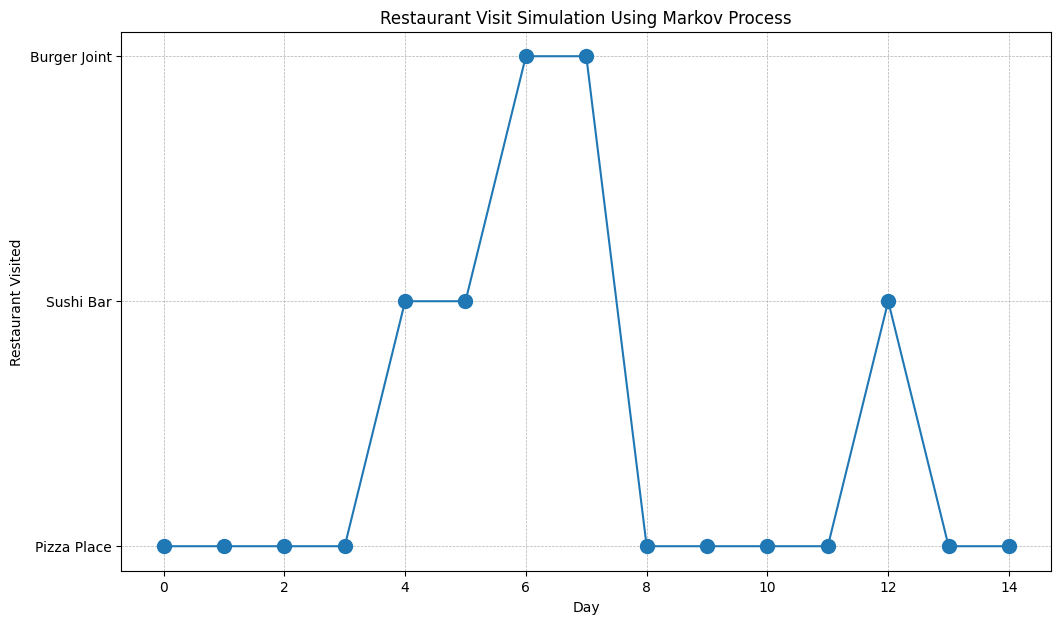

'COMMENTS : After at least 15 simulations, I can attest that one never passed to Sushi Bar if one currently is at the Burger Joint. This observation confirms the modified \nprobability list in the transition matrix.'

In [ ]:
transition_matrix1 = [[0.6, 0.4, 0.],
                     [0.1, 0.7, 0.2],
                     [0.2, 0.3, 0.5]]
"""COMMENT : From now on, the probability of going from Burger Joint (restaurant 0) to Sushi Bar (restaurant 2) is modified to 0. Let's observe what happens!"""

days = 15
visit_sequence = simulate_restaurant_visits(days, initial_probabilities, transition_matrix1)
modify_number_to_names(visit_sequence)
print(visit_sequence)
plot_restaurant_simulation(visit_sequence)

"""COMMENTS : After at least 15 simulations, I can attest that one never passed to Sushi Bar if one is currently at the Burger Joint. This observation confirms the modified
probability list in the transition matrix."""
